# Day 1

## Importing necessary Libraries

In [1]:
import numpy as np                              # For mathematical operations and matrix manipulations
import pandas as pd                             # For Data Cleaning and performing operations on columns
from sklearn.preprocessing import LabelEncoder  # For Working with categorical data

In [2]:
df = pd.read_csv('data.csv')                    # Import the csv file as Dataframe

In [3]:
df.head()                                       # Peeking into first 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [4]:
df.tail()                                       # Peeking into last 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9
31526,35054,2017,2.0,28.0,14.0,5.0,14.6,1013.3,0.0,N,3.6


In [5]:
df.drop(columns='Unnamed: 0', inplace= True)    # Drop unnecesary columns

In [6]:
df.info()                                       # Provides initial info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31512 non-null  object 
 1   month           31521 non-null  float64
 2   day             31507 non-null  float64
 3   hour            31519 non-null  float64
 4   PM2.5           31513 non-null  float64
 5   temperature     31508 non-null  float64
 6   pressure        31500 non-null  object 
 7   rain            31515 non-null  float64
 8   wind_direction  31467 non-null  object 
 9   wind_speed      31502 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.4+ MB


In [7]:
df.describe(include = 'all')                    # Brief quantitative description of the dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31512,31521.000000,31507.000000,31519.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,6,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,2015,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,8540,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,NaN,6.451001,15.413083,11.288429,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,NaN,3.326838,33.139925,37.127145,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,NaN,-37.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,NaN,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,NaN,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,NaN,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conclusions from Description and Info:-
    -> There are 31527 samples in the dataset.
    -> All the Columns have a few NaN values.
    -> Date and Time are spread across four different columns.
        -> We shall convert them to standard Datetime format for better analysis.
    -> "PM2.5" stands for Particulate Matter particles that are less than 2.5 micrometer.
        -> The maximum value is exponentially greater than 75th percentile value.
    -> Temperature ranges from -16.8 units to +40.5 units.
    -> Pressure is available as object data type. So, conclusions shall be derived after conversion to numerical format.
    -> Rainfall is 0 for most of the cases(>75 % of the samples). 
    -> Wind Direction is a categorical data with 16 categories representing various directions.
    -> Wind Speed has a maximum value of 11.2 units. A negative minimum value represents presence of anomalies.

# Analysing date and time columns

In [8]:
# Year column consists values of string datatype. But, the length of string should be 4.
# So, we take advantage of this factor to get indices of rows with anomalies in the year column
year_anomalies = (df[df.year.str.len() != 4]).index 

# We use the year data of previous sample in the sample with anomaly.
for idx in year_anomalies:
    df.loc[idx, 'year'] = df.loc[idx - 1, 'year']

df.year = (df.year.astype(np.int32))                                    # Conversion to int datatype.
print(f"The number of anomalies in year was {len(year_anomalies)}")
df.loc[year_anomalies]

The number of anomalies in year was 16


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
944,2013,4.0,9.0,8.0,12.0,7.5,1015.1,0.0,NNW,6.2
2272,2013,6.0,3.0,18.0,105.0,29.0,999.6,0.0,SW,1.1
7553,2014,1.0,10.0,4.0,43.0,-8.7,1024.9,0.0,NE,1.4
8937,2014,3.0,9.0,22.0,74.0,3.4,1021.5,0.0,S,3.3
13710,2014,9.0,28.0,12.0,81.0,21.5,1010.5,0.0,W,NaN
13719,2014,9.0,28.0,23.0,76.0,15.4,1008.7,0.0,NE,0.4
15604,2015,1.0,1.0,16.0,41.0,2.0,1019,0.0,SW,2.8
18485,2015,5.0,4.0,13.0,14.0,21.7,1010.3,0.0,SW,4.3
23716,2015,12.0,NaN,11.0,269.0,1.8,1019.8,0.0,ESE,1.1


In [9]:
# Manually correcting the zeroth index to use it for other samples.
df.loc[0, 'month'] = 3.0

month_anomalies = (df[(df.month < 0)]).index                            # Month values can't be < 0.
month_anomalies = month_anomalies.append(df[df.month.isna()].index)

# We use the month data of previous sample in the sample with anomaly.
for idx in month_anomalies:
    df.loc[idx, 'month'] = df.loc[idx - 1, 'month']

df.month = (df.month.astype(np.int32))
print(f"The count of anomalies in months was {len(month_anomalies) + 1}")
df.loc[month_anomalies]

The count of anomalies in months was 8


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,3,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
13709,2014,9,28.0,11.0,58.0,20.7,1010.9,0.0,E,0.7
15598,2015,1,1.0,10.0,15.0,-1.0,1029,0.0,ENE,1.1
18479,2015,5,4.0,7.0,10.0,15.2,1015.5,0.0,ENE,NaN
24181,2016,1,3.0,1.0,541.0,-3.3,1016.8,0.0,ENE,1.2
24877,2016,2,1.0,11.0,9.0,0.4,1032.7,0.0,NNW,4.0
30228,2016,9,30.0,5.0,77.0,13.2,1012.8,0.0,N,1.2


In [10]:
day_anomalies = (df[(df.day < 0)]).index                                 # Day values can't be < 0.          
day_anomalies = day_anomalies.append(df[df.day.isna()].index)

# We use the day data of previous sample in the sample with anomaly.
for idx in day_anomalies:
    df.loc[idx, 'day'] = df.loc[idx - 1, 'day']

df.day = (df.day.astype(np.int32))
print(f"The count of anomalies in days was {len(day_anomalies)}")
df.loc[day_anomalies]

The count of anomalies in days was 21


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24455,2016,1,14,12.0,91.0,3.0,1016.1,0.0,WNW,2.5
19,2013,3,1,19.0,8.0,2.3,1028.3,0.0,NaN,2.8
175,2013,3,8,7.0,309.0,5.7,1000.4,0.0,NNE,1.0
222,2013,3,10,6.0,18.0,-2.0,1022.5,0.0,N,0.0
368,2013,3,16,8.0,278.0,8.4,1020.7,0.0,W,1.1
463,2013,3,20,7.0,27.0,-2.3,1020.2,0.0,SSW,0.1
516,2013,3,22,12.0,63.0,9.2,1012.5,0.0,WSW,5.0
631,2013,3,27,7.0,186.0,5.3,1004.2,0.0,NNE,1.6
929,2013,4,8,17.0,32.0,9.8,1008.4,0.0,NNW,5.4
5543,2013,10,18,6.0,180.0,6.8,1020.6,0.0,ENE,1.2


In [11]:
hour_anomalies = (df[(df.hour < 0)]).index                                       # Hour values can't be < 0
hour_anomalies = hour_anomalies.append(df[df.hour.isna()].index)

# We use the hour data of previous sample in the sample with anomaly.
for idx in hour_anomalies:
    if (df.loc[idx - 1, 'hour'] == 23):                         # After 2300 hours, time goes to 00 hours.
        df.loc[idx, 'hour'] = 0
    else:
        df.loc[idx, 'hour'] = df.loc[idx - 1, 'hour'] + 1       # Dataset has a general movement of time in 1 hour.

df.hour = (df.hour.astype(np.int32))
print(f"The count of anomalies in hours was {len(hour_anomalies)}")
df.loc[hour_anomalies]

The count of anomalies in hours was 9


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24391,2016,1,11,20,15.0,-4.7,1031.2,0.0,NW,3.4
5,2013,3,1,5,5.0,-2.2,1025.6,0.0,N,3.7
627,2013,3,27,3,129.0,4.3,1001.7,0.0,W,0.8
936,2013,4,9,0,9.0,6.6,1010.4,0.0,NW,4.1
5554,2013,10,18,17,207.0,12.6,1017.9,0.0,SSE,0.0
7556,2014,1,10,7,24.0,-8.1,1025.3,0.0,NNE,1.3
24184,2016,1,3,4,407.0,-2.6,1017.3,0.0,E,1.8
25793,2016,3,11,18,31.0,6.6,1015.8,0.0,SW,3.7
25892,2016,3,16,4,230.0,2.8,1012.2,0.0,NE,1.2


In [12]:
df.describe(include = 'all')

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31527.000000,31527.000000,31527.000000,31527.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,2014.516827,6.453167,15.590890,11.493069,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,1.105097,3.309035,8.792301,6.932282,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,2013.000000,1.000000,1.000000,0.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conversion of dates and times from integers to a single column in Datetime format

In [13]:
df['Date'] = pd.to_datetime(df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str) + " " + df.hour.astype(str) + ":00:00")

df.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

In [14]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,566,NaN,16,NaN,NaN
top,NaN,NaN,1019,NaN,NE,NaN,NaN
freq,NaN,NaN,216,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949,2015-01-04 18:42:04.921498624
min,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,NaN,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31513 non-null  float64       
 1   temperature     31508 non-null  float64       
 2   pressure        31500 non-null  object        
 3   rain            31515 non-null  float64       
 4   wind_direction  31467 non-null  object        
 5   wind_speed      31502 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.7+ MB


In [16]:
df = df.sort_values('Date')

In [17]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,102-37,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [18]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


# Analysis on variation and outliers in Pressure

In [19]:
pressure_anomalies = df[df.pressure.isna()].index           # Getting indices of rows with NaN values of Pressure. 
print(len(pressure_anomalies))

27


In [20]:
df.loc[pressure_anomalies]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
2263,180.0,27.0,NaN,0.0,E,1.4,2013-03-06 09:00:00
628,135.0,2.9,NaN,0.0,W,0.9,2013-03-27 04:00:00
930,19.0,9.2,NaN,0.0,NW,5.0,2013-08-04 18:00:00
5550,234.0,16.8,NaN,0.0,N,1.0,2013-10-18 13:00:00
13195,143.0,23.9,NaN,0.0,SE,0.1,2014-07-09 01:00:00
8944,26.0,0.3,NaN,0.0,ENE,1.5,2014-10-03 05:00:00
15600,25.0,1.0,NaN,0.0,WSW,2.9,2015-01-01 12:00:00
15919,243.0,-1.7,NaN,0.0,ENE,1.4,2015-01-14 21:00:00
16229,26.0,NaN,NaN,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,NaN,NaN,NaN,NaN,2015-02-18 07:00:00


In [21]:
df.pressure.fillna(method='ffill', inplace=True)                # Fill Na using "forward fill method"

# Zeroth index had "102-37" as Pressure value. After analysing values of Pressure in other samples, it is most likely "1023.7".
# So, we manually corrected it.
df.loc[0, 'pressure'] = '1023.7'

df['pressure'] = df.pressure.astype(np.float64)

In [22]:
pressure_anomaly = df[df.pressure < 800].index
pressure_anomaly

Int64Index([24314], dtype='int64')

In [23]:
# Since there is only one anomaly, so we fix it manually.
df.loc[pressure_anomaly, 'pressure'] = df.loc[pressure_anomaly - 1, 'pressure']


In [24]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31526.000000,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,1011.015412,0.071744,NaN,1.696949,2015-01-04 18:42:04.921499136
min,3.000000e+00,-16.800000,985.900000,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [25]:
# Pressure column is still containing an NaN value. So, using fillna to fix this.
df.pressure.fillna(method='ffill', inplace=True)

# Analysis of Wind Speed

In [26]:
df[df.wind_speed < 0]                                       # Peeking samples with negative wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
23931,175.0,5.9,1021.7,0.0,NE,-66.0,2015-12-23 13:00:00
24132,209.0,-2.5,1024.5,0.0,NNE,-79.0,2016-01-01 00:00:00


In [27]:
wind_speed_anomaly = df[df.wind_speed < 0].index            # Got indices of samples with neg wind speed.

# We use average of wind speed of the sample before and and after the sample with anomaly to fix it.
for idx in wind_speed_anomaly:
    df.loc[idx, 'wind_speed'] = (df.loc[idx - 1, 'wind_speed'] + df.loc[idx + 1, 'wind_speed']) / 2

In [28]:
wind_speed_anomaly = df[df.wind_speed.isna()].index         # Getting indices of samples with NaN as wind speed.
df.loc[wind_speed_anomaly]                                  # Peeking samples with NaN as wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
11,3.0,NaN,1028.2,0.0,N,NaN,2013-01-03 11:00:00
2276,111.0,20.9,1001.7,0.0,E,NaN,2013-03-06 22:00:00
5542,198.0,6.7,1020.1,0.0,NE,NaN,2013-10-18 05:00:00
13710,81.0,21.5,1010.5,0.0,W,NaN,2014-09-28 12:00:00
7561,54.0,2.3,1023.6,0.0,WNW,NaN,2014-10-01 12:00:00
8942,NaN,0.3,1021.4,0.0,NE,NaN,2014-10-03 03:00:00
15602,51.0,3.0,1024.0,0.0,W,NaN,2015-01-01 14:00:00
16229,26.0,NaN,1030.5,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,NaN,2015-02-18 07:00:00


In [29]:
df.wind_speed.fillna(method='ffill', inplace=True)                      # Filled NaN with previous values in wind speed column.

In [30]:
df.wind_speed.describe()

count    31527.000000
mean         1.701871
std          1.200389
min          0.000000
25%          0.900000
50%          1.400000
75%          2.200000
max         11.200000
Name: wind_speed, dtype: float64

In [31]:
# Since the maximum value of wind speed seems to be an outlier, we check the growth in wind speed towards the end.

l = [0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999]
for per in l:
    print(df.wind_speed.quantile(per))

3.4000000000000004
4.1
5.6
6.236999999999898
7.4
7.9237000000001
8.88473999999951


# Analysis of Particulate Matter(PM2.5)

In [32]:
df[df['PM2.5'].isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
22,NaN,0.9,1030.5,0.0,ENE,1.8,2013-01-03 22:00:00
657,NaN,7.4,1017.7,0.0,ENE,1.4,2013-03-28 09:00:00
662,NaN,12.7,1014.1,0.0,W,3.5,2013-03-28 14:00:00
942,NaN,6.1,1013.7,0.0,NNW,6.0,2013-09-04 06:00:00
5559,NaN,11.7,1019.0,0.0,NE,1.1,2013-10-18 22:00:00
13208,NaN,29.6,999.7,0.0,WSW,2.4,2014-07-09 14:00:00
7566,NaN,0.2,1024.1,0.0,SW,1.9,2014-10-01 17:00:00
8942,NaN,0.3,1021.4,0.0,NE,1.1,2014-10-03 03:00:00
24182,NaN,-3.2,1016.8,0.0,NE,1.0,2016-03-01 02:00:00
24185,NaN,-3.4,1017.9,0.0,E,2.1,2016-03-01 05:00:00


In [33]:
pm_anomaly = df[df['PM2.5'].isna()].index                       
df['PM2.5'].fillna(method = 'ffill', inplace= True)

df['PM2.5'].quantile(0.99)

363.73999999999796

In [34]:
pm_outliers = df[df['PM2.5'] > 1000].index
for idx in pm_outliers:
    df.loc[idx, 'PM2.5'] = df.loc[idx - 1, 'PM2.5']     # Forward_fill method

In [35]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31508.000000,31527.000000,31515.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.356532,1011.015814,0.071744,NaN,1.701871,2015-01-04 18:42:04.921499136
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


# Analysis of Temperature

In [36]:
df[df.temperature.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
11,3.0,NaN,1028.2,0.0,N,3.6,2013-01-03 11:00:00
2269,50.0,NaN,998.1,0.0,WSW,3.9,2013-03-06 15:00:00
641,14.0,NaN,1005.5,0.0,NE,3.9,2013-03-27 17:00:00
939,8.0,NaN,1011.4,0.0,N,4.8,2013-09-04 03:00:00
16229,26.0,NaN,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
19317,13.0,NaN,1001.6,0.0,NW,2.8,2015-08-06 10:00:00
24186,245.0,NaN,1018.3,0.0,ENE,0.9,2016-03-01 06:00:00
25002,13.0,NaN,1022.5,0.0,NW,3.2,2016-06-02 16:00:00
29988,75.0,NaN,1010.6,NaN,SW,3.1,2016-09-14 15:00:00


In [37]:
df.temperature.fillna(method='ffill', inplace = True)

# Analysis on Rainfall

In [38]:
df[df.rain.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
13713,70.0,22.0,1008.5,NaN,WSW,2.0,2014-09-28 15:00:00
16229,26.0,-5.2,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.0,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
29988,75.0,29.5,1010.6,NaN,SW,3.1,2016-09-14 15:00:00
30163,168.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 19:00:00
30164,182.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 20:00:00
30165,137.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 21:00:00
30166,107.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 22:00:00
31359,126.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 05:00:00
31360,104.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 06:00:00


In [39]:
df.rain.fillna(method='ffill', inplace=True)

In [40]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921499136
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [41]:
# Since the maximum value of rainfall seems to be an outlier, we check the growth in wind speed towards the end.

print(
    df.rain.quantile(0.90),
    df.rain.quantile(0.99),
    df.rain.quantile(0.999),
    df.rain.quantile(0.9999),
    df.rain.quantile(0.99999)

)

0.0 1.5 12.479200000001583 36.157459999985804 64.2717140000157


## Conclusions from analysis of Rain
    -> There is little or no rain on an average basis in the area over which data has been collected.
    -> Although most of the samples have zero rainfall, the movement towards the maximum value of rainfall is smooth.
    -> So, we've not considered 72.5 units of rainfall to be an outlier.

# Analysis on Wind Direction

In [42]:
df[df.wind_direction.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
19,8.0,2.300000,1028.30,0.0,NaN,2.8,2013-01-03 19:00:00
6378,82.0,-3.200000,1020.50,0.0,NaN,0.1,2013-11-22 04:00:00
11599,44.0,21.500000,998.20,0.1,NaN,0.2,2014-02-07 06:00:00
13204,209.0,24.800000,1002.80,0.0,NaN,1.0,2014-07-09 10:00:00
13723,100.0,15.300000,1007.60,0.0,NaN,0.4,2014-09-29 03:00:00
8946,60.0,0.800000,1021.20,0.0,NaN,1.9,2014-10-03 07:00:00
13286,56.0,21.700000,1008.00,0.0,NaN,0.0,2014-10-09 20:00:00
16229,26.0,-5.200000,1030.50,0.0,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.000000,1022.00,0.0,NaN,0.9,2015-02-18 07:00:00
18488,22.0,22.600000,1006.80,0.0,NaN,5.0,2015-04-05 16:00:00


In [43]:
df.wind_direction.fillna(method='ffill', inplace=True)

In [44]:
df.wind_direction.describe(include='all')

count     31527
unique       16
top          NE
freq       4478
Name: wind_direction, dtype: object

In [45]:
df.wind_direction.unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'NE', 'ESE', 'E', 'WNW', 'S', 'SE',
       'WSW', 'SW', 'SSE', 'W', 'SSW'], dtype=object)

## Conclusions From Wind_Direction
    -> Wind Direction includes a total of 16 categorical variables.
    -> These are 4 main directions, "EAST", "WEST", "NORTH", "SOUTH". And the others are just combinations of these.
    -> Encoding of categorical varables depend on various parameters, including the problem statement, if the column is input variable or target variable, or the task is just to explore the dataset.
        -> We would use "One-hot Encoding" or "Label Encoding", whichever is suitable for the upcoming task/s.

# Now, that we have Clean Dataset, we save it as a new csv file to perform further analysis productively.

In [46]:
df.to_csv('Clean_Data.csv')

In [47]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,1023.7,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,4.4,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [48]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015.0,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016.0,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


In [49]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31527,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4478,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921499136
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


**---------------------------------------------------------------------------------------------------------------------**

# Day 3

In [50]:
# Importing libraries necessary for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'#D8D8D8'})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31527 entries, 0 to 31478
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31527 non-null  float64       
 1   temperature     31527 non-null  float64       
 2   pressure        31527 non-null  float64       
 3   rain            31527 non-null  float64       
 4   wind_direction  31527 non-null  object        
 5   wind_speed      31527 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 3.2+ MB


In [53]:
df.set_index('Date', inplace=True)              # Set Data as index column

## Tasks For Day-3
    -> Analysis of all features using visualizations in different time frames.
    -> Observing Trends and following leads, to get more info about the data.
    -> Finding co-relation between features.
    -> Thorough Analysis of PM2.5

# Analysis of Temperature in different Time-frames and Relations with other features

In [54]:
df.temperature.head()

Date
2013-01-03 00:00:00   -0.7
2013-01-03 01:00:00   -1.1
2013-01-03 02:00:00   -1.1
2013-01-03 03:00:00   -1.4
2013-01-03 04:00:00   -2.0
Name: temperature, dtype: float64

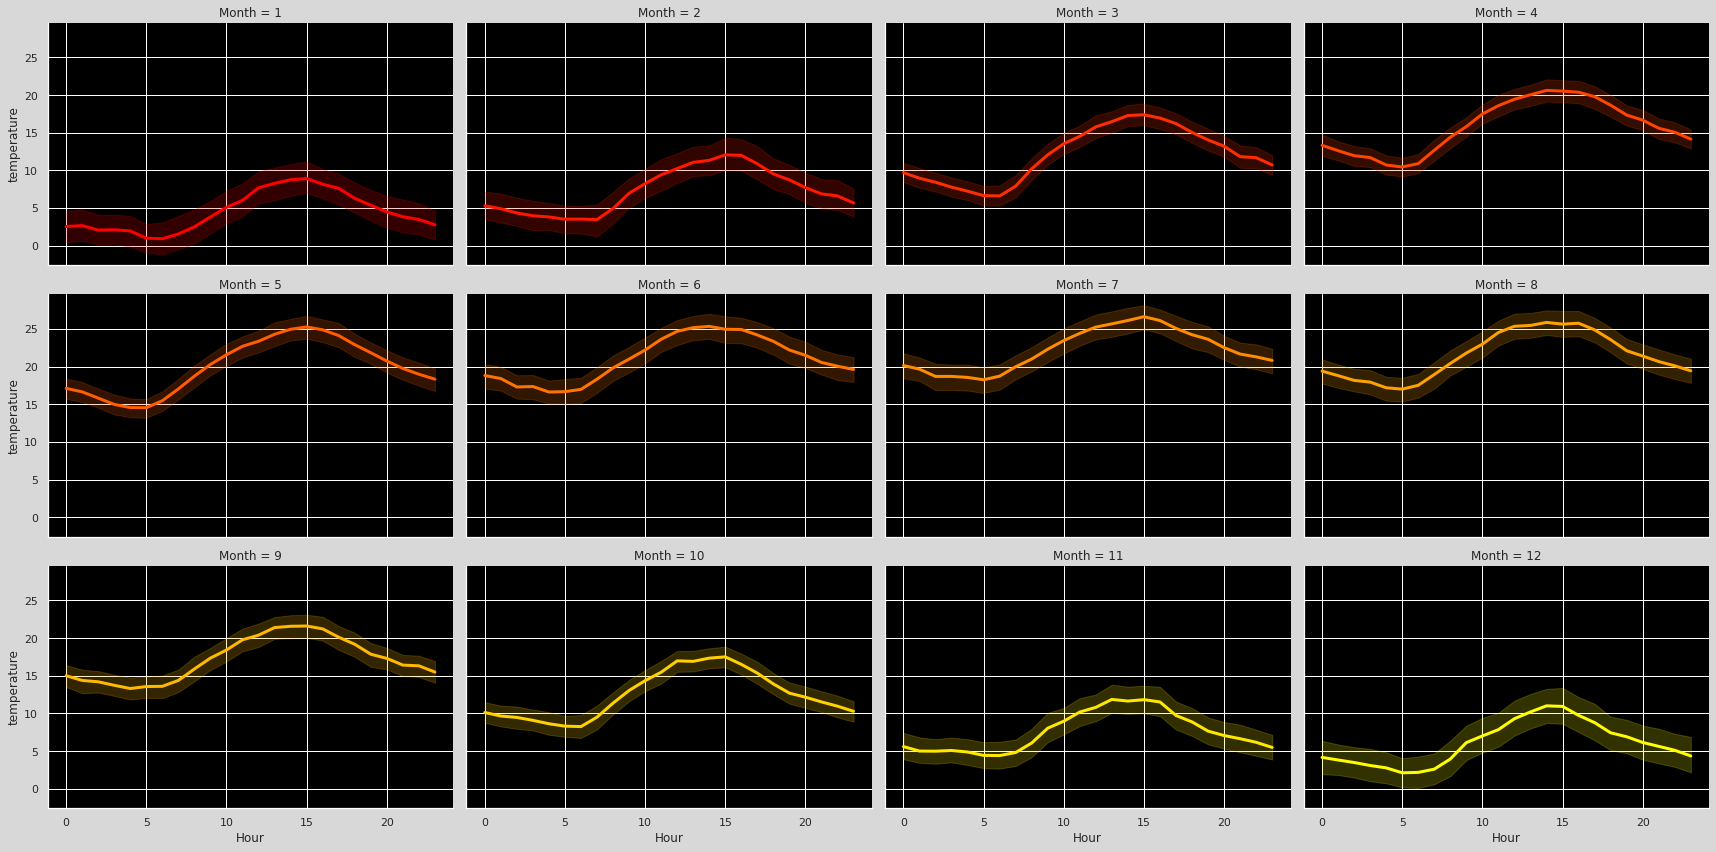

In [57]:
# Average Temperature of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.temperature,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January and December are coldest months.
    -> June, July are hottest months
    -> Days are hottest at 1500 hours and coldest at 500-600 hours.

<Figure size 432x288 with 0 Axes>

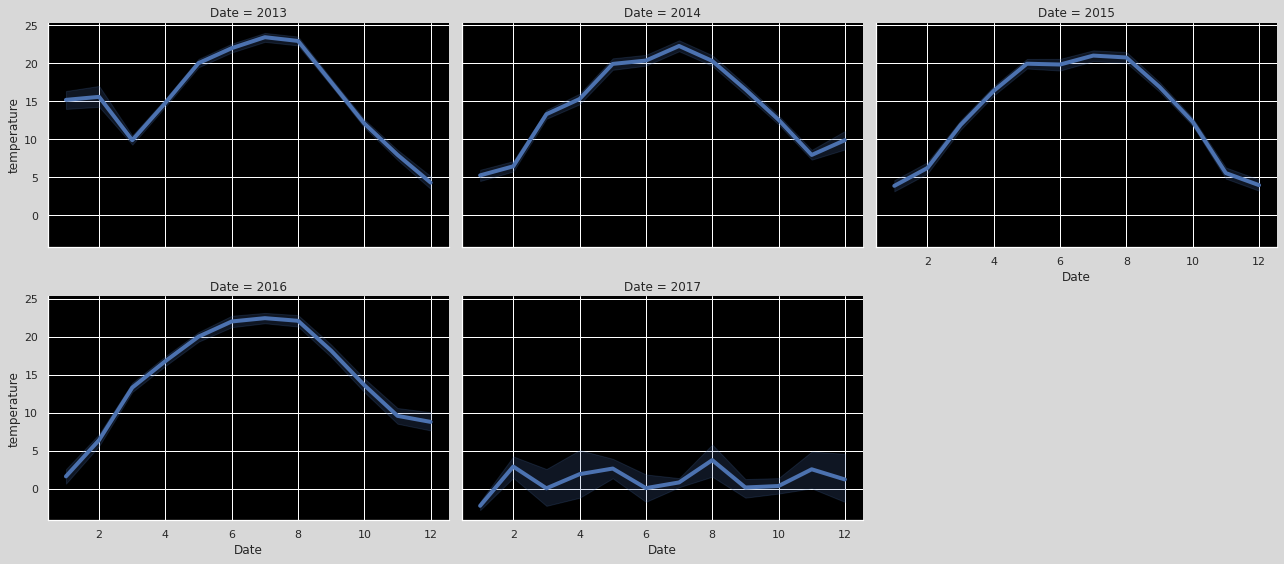

In [58]:
# Average Temperature of all months across different years.
plt.figure(facecolor='gray')
g = sns.relplot(
    data = df,
    x = df.index.month, y = df.temperature,
    col = df.index.year,
    kind = 'line', linewidth = 4,
    legend=False,
    height =4, aspect=1.5, zorder = 5, col_wrap=3,
)



## Observations-
    -> The data in the first 4 years are evenly spread.
    -> We shall dig deeper into how the samples are spread in 2017.
    -> This will help us know, if the values of temperature in 2017 are not correct, or the sample is unevenly spread.

## Digging Deep into 2017

Text(0.5, 1.0, 'Scatter of samples in 2017')

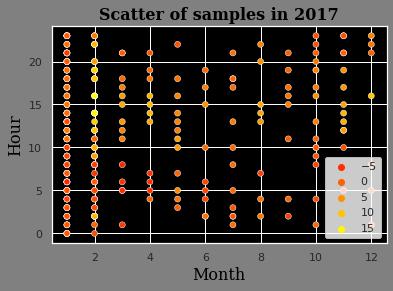

In [59]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = df[df.index.year == 2017].index.month,
    y = df[df.index.year == 2017].index.hour,
    data = df[df.index.year == 2017],
    hue= df[df.index.year == 2017].temperature,
    palette= sns.color_palette("autumn", as_cmap=True)
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Hour', fontdict=font)
plt.xlabel('Month', fontdict=font)
plt.title('Scatter of samples in 2017', fontdict=font_title)

## Observations-
    -> Most of the samples in 2017 belong to the months January, or February.
    -> So, the average temperature is very low in the case.
    -> Most of the samples show reddish behavious indicating they are close to -5 units of temperature.

# Pressure in different time frames

In [60]:
df.pressure.head()

Date
2013-01-03 00:00:00    1023.7
2013-01-03 01:00:00    1023.2
2013-01-03 02:00:00    1023.5
2013-01-03 03:00:00    1024.5
2013-01-03 04:00:00    1025.2
Name: pressure, dtype: float64

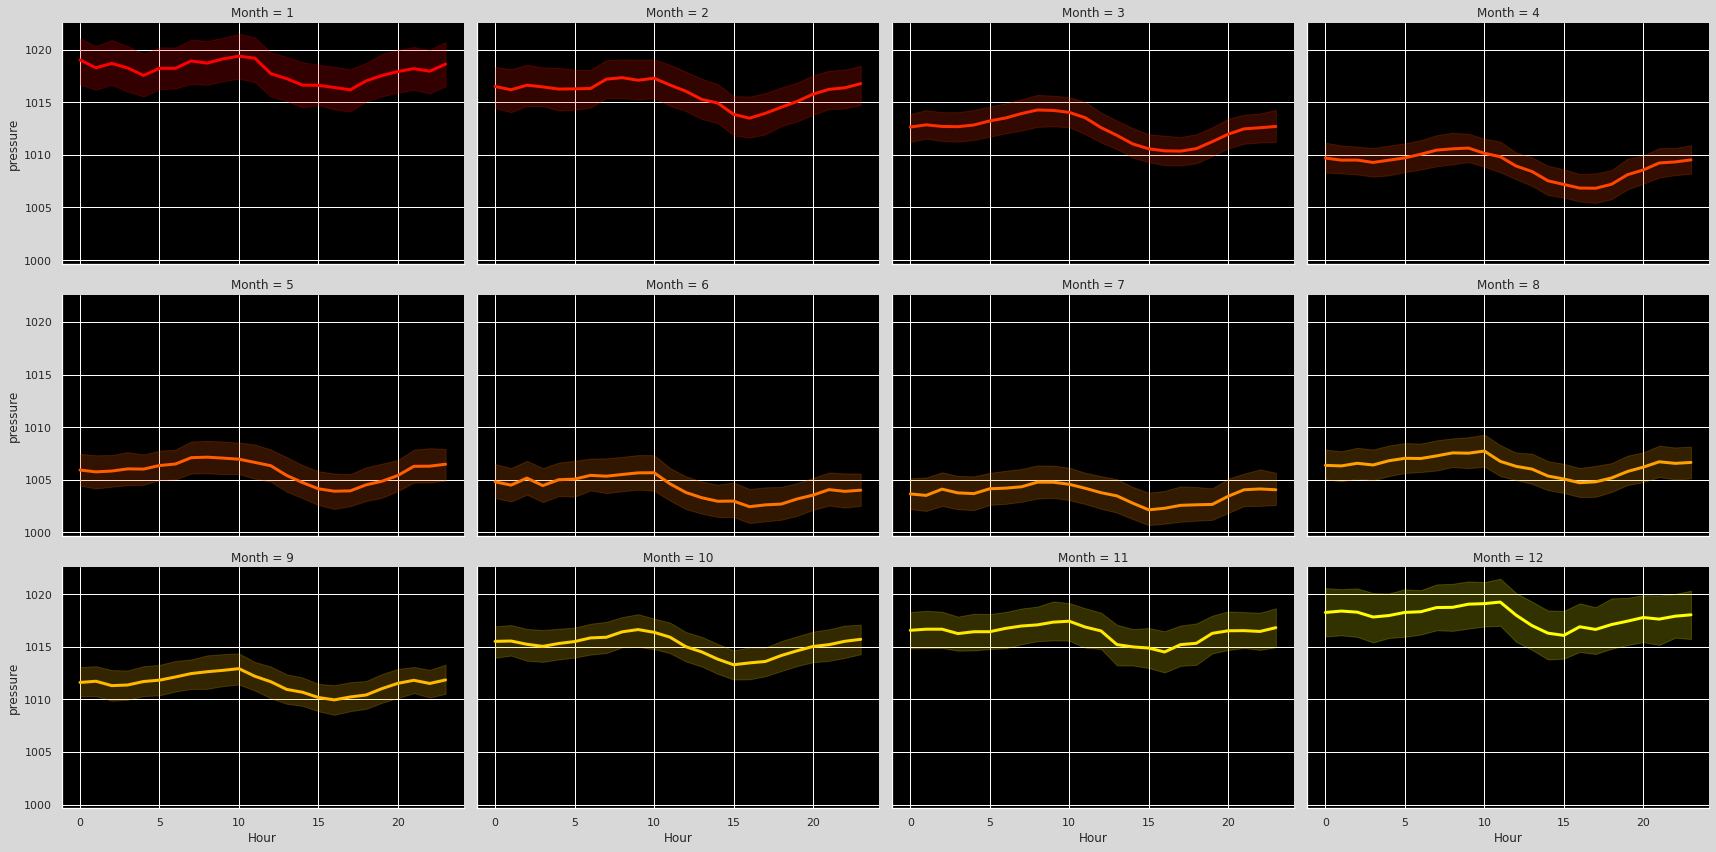

In [61]:
# Average Pressure of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.pressure,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January and December observe maximum pressure.
    -> June, July have least pressure.
    -> We observe that the trends are opposite to that of temperature.

Text(0.5, 1.0, 'Temperature vs Pressure')

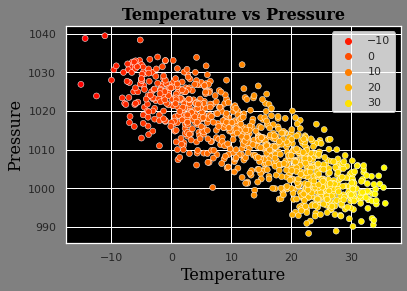

In [62]:
# Temperature vs Pressure

plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'temperature',
    y = 'pressure',
    data = df.sample(frac = 0.03, random_state = 42),   # Used 0.03 part of data, to avoid over-crowding in plot
    hue= df.sample(frac = 0.03, random_state = 42).temperature,
    palette= sns.color_palette("autumn", as_cmap=True)
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Pressure', fontdict=font)
plt.xlabel('Temperature', fontdict=font)
plt.title('Temperature vs Pressure', fontdict=font_title)

## Observations from Above Plot-
    -> Pressure is inversely proportional to temperature

# Rainfall in different time frames

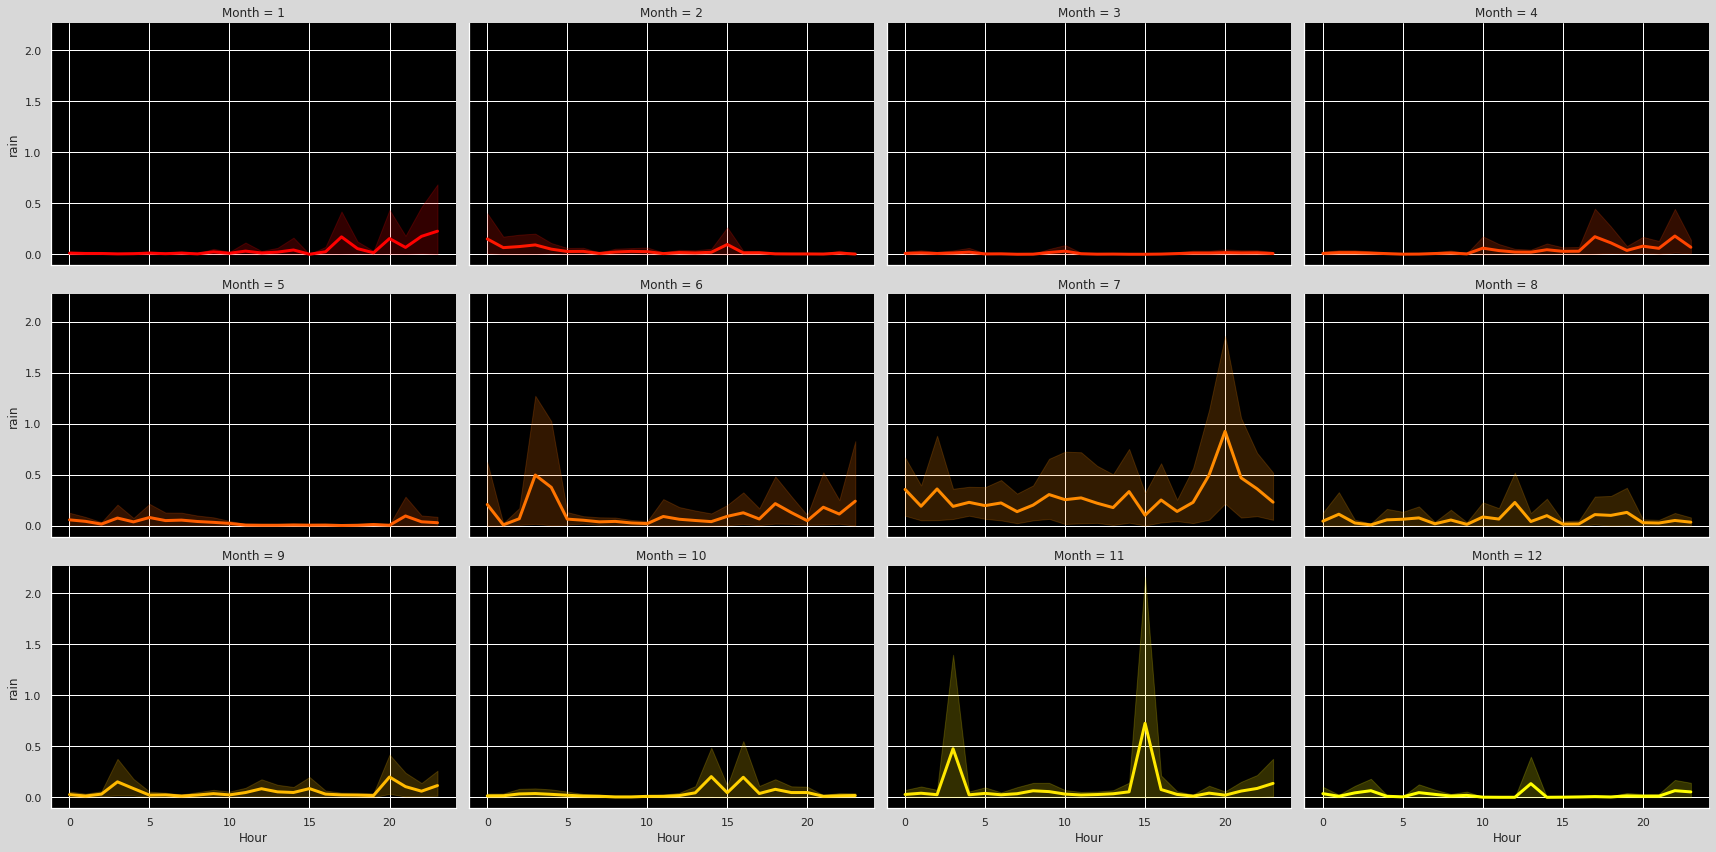

In [63]:
# Average Temperature of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.rain,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> January observes almost no showers in the first half, while there is a little rain in the fourth week.
    -> February, March, April and May observes almost no showers.
    -> In the month of June, we can see enough rain showing arrival of monsoon.
    -> July observes rainfall at peak. Some areas might get flooded.
    -> In August, we observe that the amount of rainfall is decreasing showing departure of monsoon.
    -> September and October see a little rainfall.
    -> In november, there is some rain.
    -> December is almost dry.

# Wind Speed in different time frames

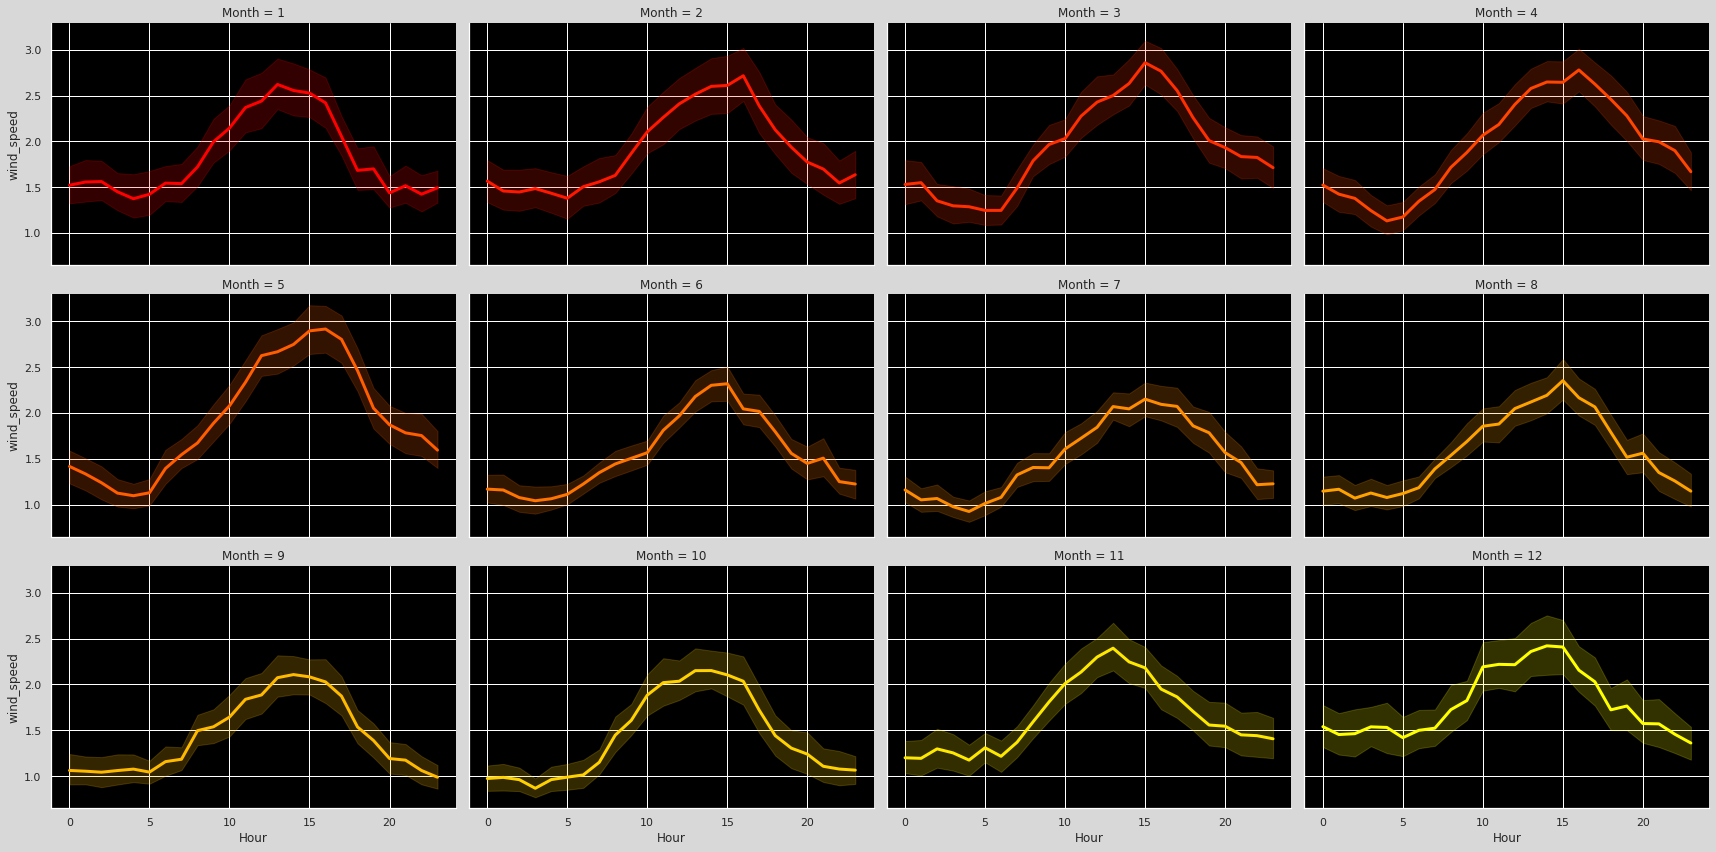

In [64]:
# Average Wind Speed of different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.wind_speed,
    col = df.index.month, hue = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette('autumn', as_cmap=True),
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## OBSERVATIONS :-
    -> We can observe that the wind speed follows the same trends each month.
    -> Peak is observed in between 1000-1600 hours.

# Analysing Different Features with different wind directions

In [65]:
wind_directions = df.wind_direction.unique()
wind_directions

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'NE', 'ESE', 'E', 'WNW', 'S', 'SE',
       'WSW', 'SW', 'SSE', 'W', 'SSW'], dtype=object)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Temperature Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

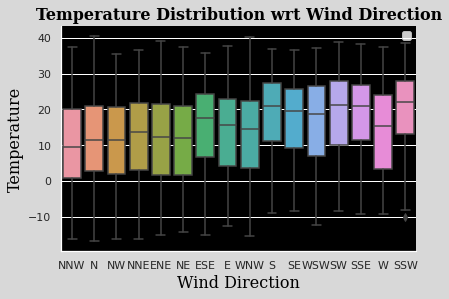

In [66]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'temperature',
    data = df, ci = None,
    height=4, aspect=1.5,
    legend=True, legend_out=True,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Temperature', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Temperature Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS :-
    -> From the temp~wind_direction box plot, we observe that in the median temperature range of 10-12 degrees, wind direction might be NNW,N,NW,NNE,ENE or NE.
    -> In the median temp range of 15-18 degrees, wind direction might be ESE,E,WNW,SSE,WSW,SW,SSE,W or SSW

Text(0.5, 1.0, 'Pressure Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

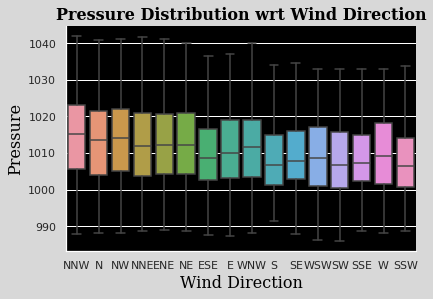

In [67]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'pressure',
    data = df, ci = None,
    height=4, aspect=1.5,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.ylabel('Pressure', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Pressure Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS :-
    -> From the Pressure~Wind_direction box plot,  we observe that the median pressure doesn't vary much against wind direction.
    -> Pressure value remains between 1010-1020 units for each type of wind direction. This is not a huge difference.

Text(0.5, 1.0, 'Rainfall Distribution wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

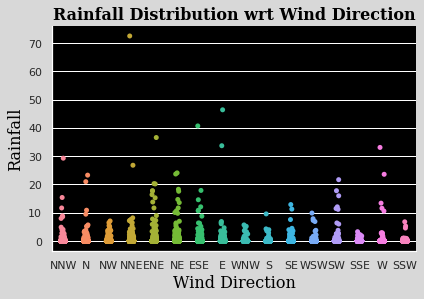

In [68]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'rain',
    data = df, ci = None,
    height=4, aspect=1.5
)
plt.ylabel('Rainfall', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Rainfall Distribution wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS:-
    -> From the Rainfall~Wind_direction box plot, we observe that rainfall lies between 0-10 units for every direction, however, peaks are observed for the ENE,NE,ESE and SW directions.

Text(0.5, 1.0, 'Particulate Matter wrt Wind Direction')

<Figure size 432x288 with 0 Axes>

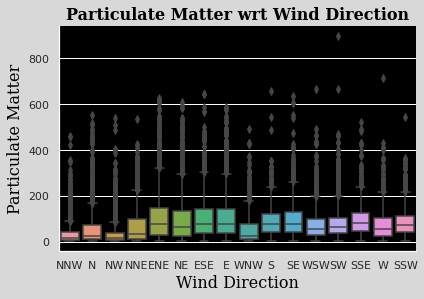

In [69]:
plt.figure(facecolor='gray')
sns.catplot(
    x = 'wind_direction', y = 'PM2.5',
    data = df, ci = None,
    height=4, aspect=1.5,
    kind = 'box', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"}
)
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Wind Direction', fontdict=font)
plt.title('Particulate Matter wrt Wind Direction', fontdict=font_title)


## OBSERVATIONS:-
    -> The particulate matter generally lies around 100 units.
    -> So the 25th and 75th percentile values are very close.

# Analysis Of Particulate Matter

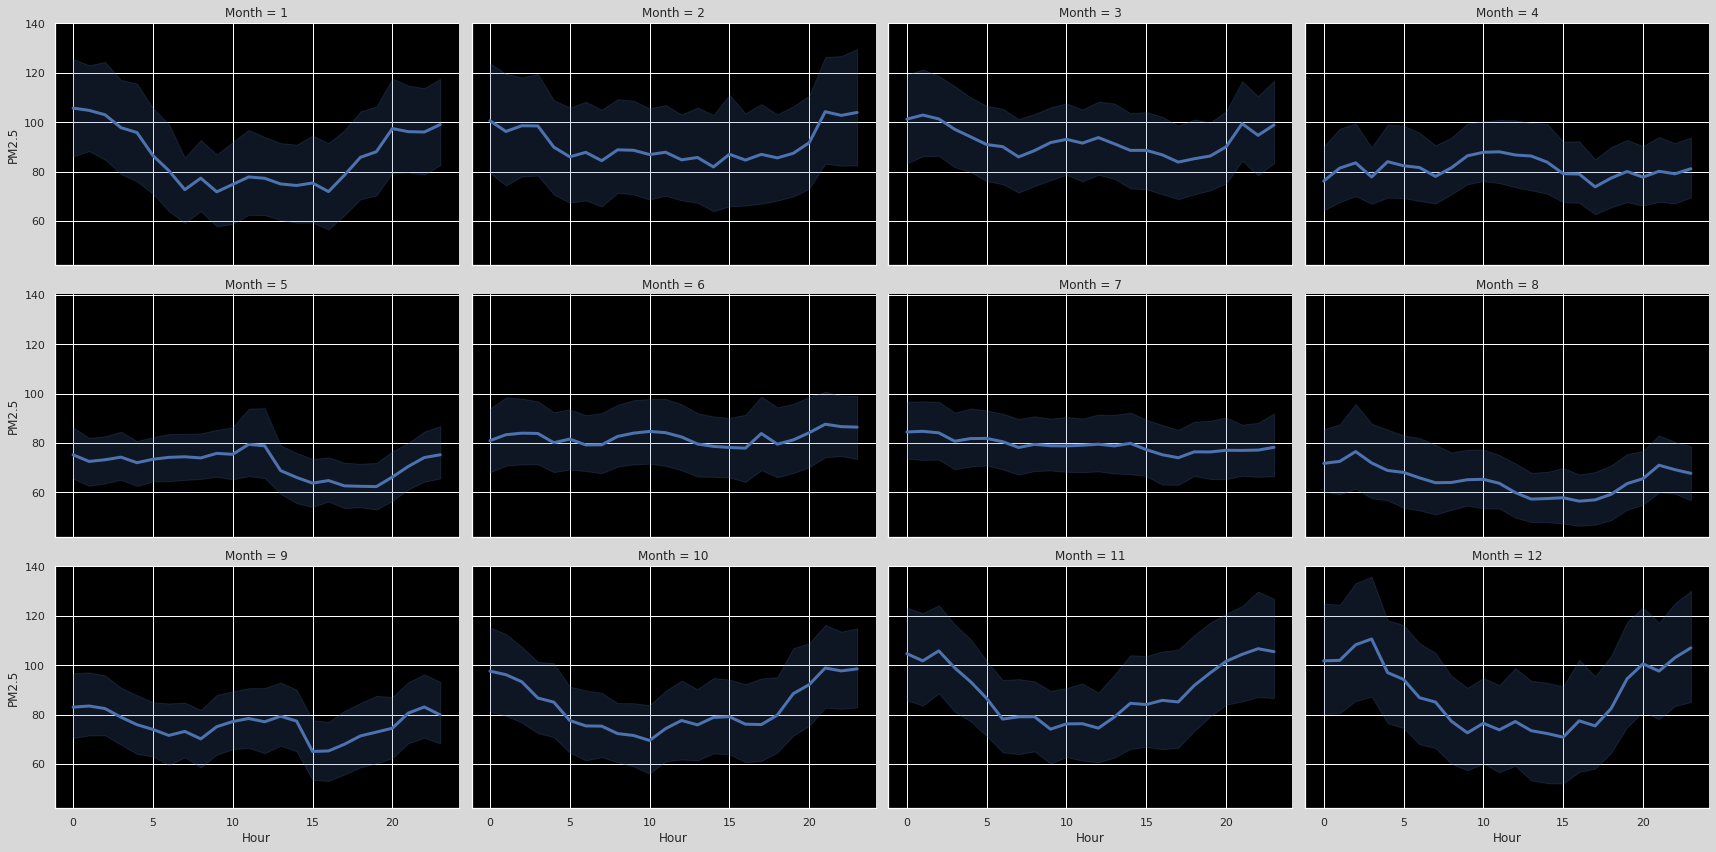

In [70]:
# Average presence of Particulate Matter in Atmosphere at different times of a day in different months.
g = sns.relplot(
    data = df,
    x = df.index.hour,
    y = df['PM2.5'],
    col = df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
)
g.set_xlabels('Hour')
g.set_titles(template="Month = {col_name}")


## Observations from above plot-
    -> Presence of PM2.5 is very high during night and end of an year.
    -> As already studied above, January and December are coldest months.
    -> This bring us to a hypothesis that the presence of Particulate Matter increases with decrease in temperature.
    -> We shall plot a scatter of temperature vs PM2.5 to verify this hypothesis.

Text(0.5, 1.0, 'Particulate Matter vs Temperature Distribution')

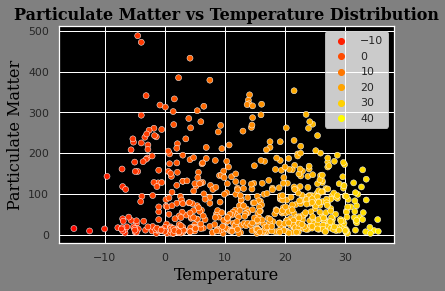

In [71]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'temperature',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.temperature,                                          
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Temperature', fontdict=font)
plt.title('Particulate Matter vs Temperature Distribution', fontdict=font_title)

## Observations -
    -> The hypothesis that presence of PM2.5 is greater at lower temperatures stand correct.

Text(0.5, 1.0, 'Particulate Matter vs Pressure')

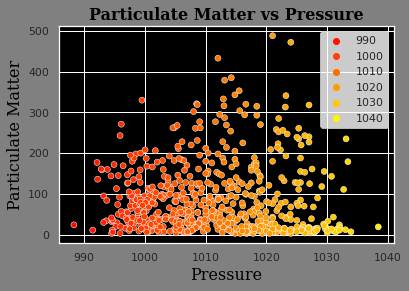

In [72]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'pressure',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.pressure,                                           # Adding Pressure as Hue to check it's effect
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Pressure', fontdict=font)
plt.title('Particulate Matter vs Pressure', fontdict=font_title)

## Observations from Pressure vs Particulate Matter
    -> Presence of PM2.5 is higher when pressure is high.

Text(0.5, 1.0, 'Particulate Matter vs Rainfall')

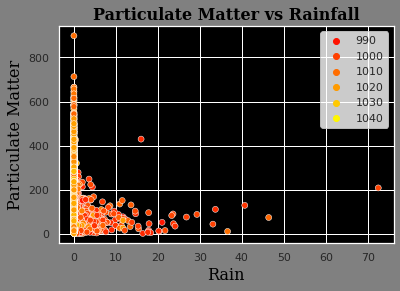

In [73]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'rain',
    y = 'PM2.5',
    data = df,
    hue= df.pressure,
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Rain', fontdict=font)
plt.title('Particulate Matter vs Rainfall', fontdict=font_title)

## Observations from PM2.5 vs Rainfall-
    -> Although rain has fewer non-zero samples, we observe that even little rainfall brings down presence of particulate matter.
    -> So, rainfall is good to keep the presence of PM2.5 low.

Text(0.5, 1.0, 'Particulate Matter vs Wind Speed')

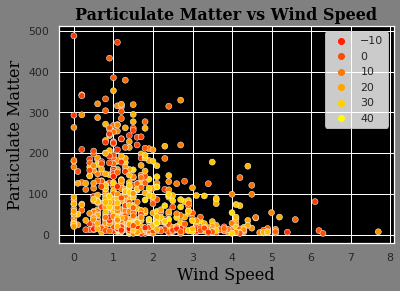

In [74]:
plt.figure(facecolor='gray')
sns.scatterplot(
    x = 'wind_speed',
    y = 'PM2.5',
    data = df.sample(frac = 0.02, random_state = 42),
    hue= df.temperature,
    palette= sns.color_palette("autumn", as_cmap=True),
).set_facecolor('black')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_x((1, 1))
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Wind Speed', fontdict=font)
plt.title('Particulate Matter vs Wind Speed', fontdict=font_title)

## Observations from Particulate Matter vs Wind Speed-
    -> The presence of Particulate Matter decreases with increase in wind speed.

# Correlation Matrix with Heat signatures at high correlation

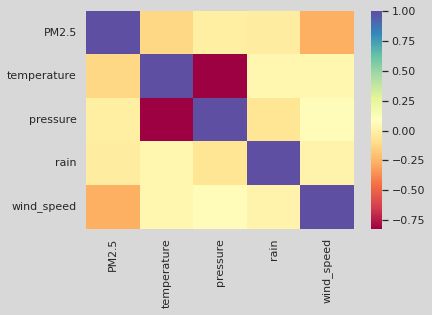

In [75]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = sns.color_palette("Spectral", as_cmap=True)
            
)

## Observations from Correlation Heatmap -
    -> Pressure and Temperature are inversely co-related.
    -> Particulate Matter shows good positive co-relation with Wind Speed.
    -> The other features do not show any relation with each other.

# Hereby, we conclude our tasks of Day-3, with following observations:-
    -> June and July are hottest months, while December and January are coldest.
    -> Nights are cooler than Days.
    -> The samples from 2017 are concentrated in January and February.
    -> Temperature and Pressure are Inversely Proportional.
    -> July observes highest amount of rainfall, with June being the second. Other months face almost no rainfall.
    -> Wind Speed is highest in the day between 1000-1600 hours.
    -> Particulate Matter(PM2.5) increases with decrease in Temperature.
    -> Rainfall brings the presence of Particulate Matter(PM2.5) substantially down.
    -> The presence of Particulate Matter(PM2.5) is low, when wind speed is high.

# Day 4 : Prediction of PM2.5

In [76]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,
2013-01-03 00:00:00,4.0,-0.7,1023.7,0.0,NNW,4.4
2013-01-03 01:00:00,8.0,-1.1,1023.2,0.0,N,4.4
2013-01-03 02:00:00,7.0,-1.1,1023.5,0.0,NNW,5.6
2013-01-03 03:00:00,6.0,-1.4,1024.5,0.0,NW,3.1
2013-01-03 04:00:00,3.0,-2.0,1025.2,0.0,N,2.0


In [77]:
df[df.isna().any(axis=1)]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,


In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Particulate Matter across Time')

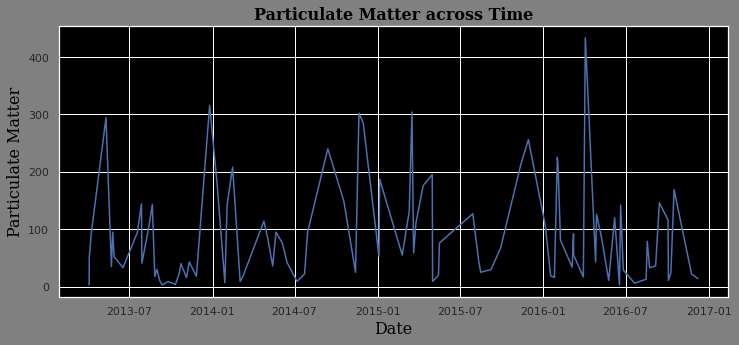

In [79]:
plt.figure(facecolor='gray', figsize = (12, 5))
sns.lineplot(
    x = df.sample(frac = 0.003, random_state = 42).index,
    y = df.sample(frac = 0.003, random_state = 42)['PM2.5'],
    data = df.sample(frac = 0.003, random_state = 42)   

).set_facecolor('black')
plt.ylabel('Particulate Matter', fontdict=font)
plt.xlabel('Date', fontdict=font)
plt.title('Particulate Matter across Time', fontdict=font_title)

## Splitting the data before 2016 June as train and after 2016 June as test set.
    -> Since this is time series data, it's a good prectise to keep initial samples as train and final samples as test set

In [80]:
# Checking duplicate indices 
df[(df.index.duplicated(keep = 'first') == True)]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
Date,,,,,,


In [81]:
# Removing Duplicate indices
df = df[(df.index.duplicated(keep = 'first') == False)]

In [82]:
train, test = df.loc[:'2016-01-01'], df.loc['2016-01-01':'2016-12-31']

In [83]:
train.describe(include = 'all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,24156.000000,24156.000000,24156.000000,24156.000000,24156,24156.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,3623,NaN
mean,85.247611,14.359619,1010.679732,0.067875,NaN,1.633660
std,81.354138,11.007544,10.052283,0.919300,NaN,1.195794
min,3.000000,-12.200000,985.900000,0.000000,NaN,0.000000
25%,25.000000,4.600000,1002.500000,0.000000,NaN,0.900000
50%,62.000000,15.700000,1010.100000,0.000000,NaN,1.400000
75%,118.000000,23.400000,1018.600000,0.000000,NaN,2.100000


In [84]:
test.index[-1]

Timestamp('2016-12-31 20:00:00')

In [85]:
test.describe(include = 'all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,7100.000000,7100.000000,7100.000000,7100.000000,7100,7100.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,784,NaN
mean,69.152254,14.872720,1011.654527,0.087408,NaN,1.923592
std,71.891010,12.086384,10.541644,1.062036,NaN,1.184244
min,3.000000,-16.800000,989.700000,0.000000,NaN,0.000000
25%,18.000000,4.500000,1003.000000,0.000000,NaN,1.100000
50%,47.000000,17.200000,1010.000000,0.000000,NaN,1.600000
75%,94.000000,25.100000,1019.800000,0.000000,NaN,2.500000


(-0.1, 0.1)

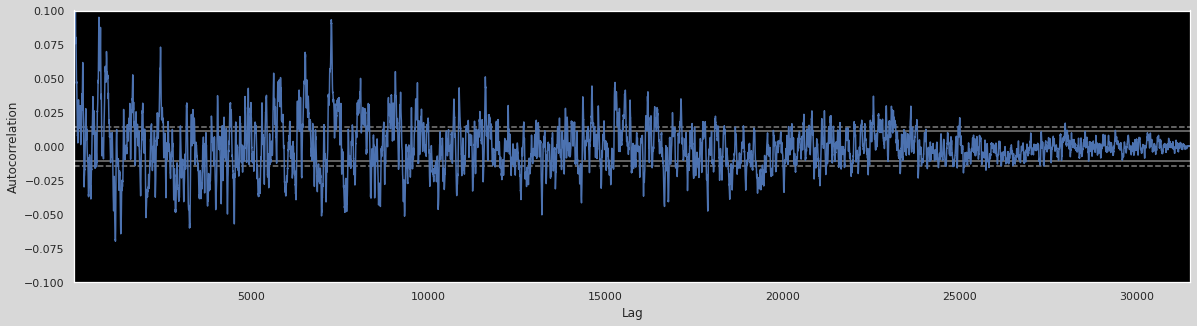

In [86]:
# Now, let's see effect of previous data on PM2.5 values in train set
plt.figure(1, figsize = (20,5))
pd.plotting.autocorrelation_plot(df['PM2.5'])
plt.ylim((-0.1, 0.1))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


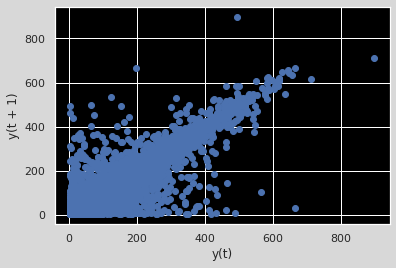

In [87]:
pd.plotting.lag_plot(df['PM2.5'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


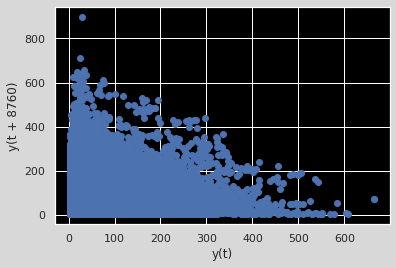

In [88]:
pd.plotting.lag_plot((df)['PM2.5'], lag = 8760)

In [89]:
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [91]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#D8D8D8'})

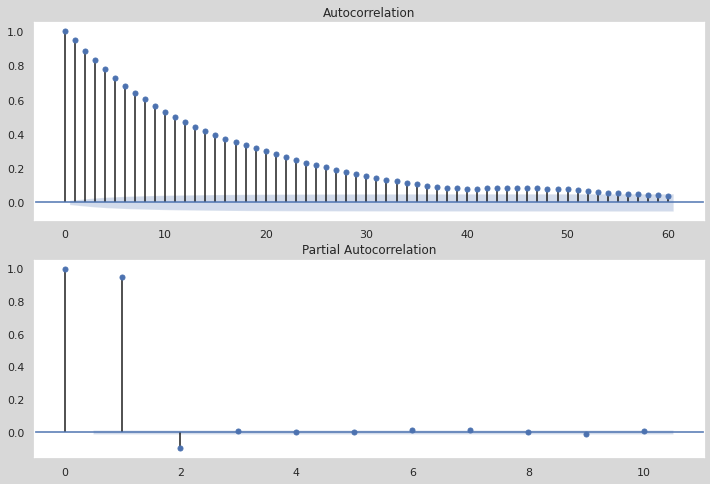

In [92]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['PM2.5'].dropna(), lags = 60, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['PM2.5'].dropna(), lags = 10, ax = ax2)

## Observations from Autocorrelation and Partial Autocorrelation Plots
    -> autoregressive models(p) is 1, since pacf shuts off after 1
    -> moving average model(q) is around 40.

# ARIMA

In [93]:
# Trying Auto Regressive Model (ARIMA)
from statsmodels.tsa.arima_model import ARIMA

In [94]:
model = ARIMA(train['PM2.5'], order = (1, 0, 4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [95]:
model_fit = model.fit()

In [96]:
train['Predicted'] = model_fit.predict(start = 10000, end = 15000, dynamic = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
check = train.iloc[10000:15000]

In [98]:
r2_score(check['PM2.5'], check.Predicted)

0.0027048749560376617

# Trying out VAR model

In [99]:
from scipy.stats import pearsonr
from statsmodels.tsa.api import VAR
import statsmodels as sm

In [100]:
ws_pm_df = train[['PM2.5', 'wind_speed', 'temperature', 'rain']]


In [101]:
model = sm.tsa.api.VARMAX(ws_pm_df, order=(5, 0), trend='c')
model_result = model.fit(maxiter=1, disp=False)
model_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dep. Variable:,"['PM2.5', 'wind_speed', 'temperature', 'rain']",No. Observations:,24156
Model:,VAR(5),Log Likelihood,-217821.345
,+ intercept,AIC,435830.690
Date:,"Sat, 18 Sep 2021",BIC,436591.365
Time:,20:32:39,HQIC,436077.303
Sample:,0,,
,- 24156,,
Covariance Type:,opg,,
Ljung-Box (Q):,"124.18, 169.79, 1880.02, 24.05",Jarque-Bera (JB):,"5299897.96, 16223.11, 4228144.68, 5271669469.50"
Prob(Q):,"0.00, 0.00, 0.00, 0.98",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.94, 1.02, 1.04, 0.77",Skew:,"-0.12, 0.79, -0.50, 38.33"


<Figure size 864x864 with 0 Axes>

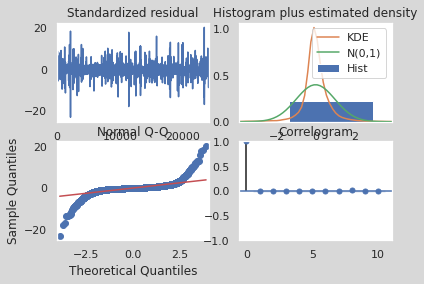

In [102]:
plt.figure(figsize = (12, 12))
model_result.plot_diagnostics()
plt.show()

In [103]:
ws_pm_df.tail()

,PM2.5,wind_speed,temperature,rain
Date,,,,
2016-01-01 19:00:00,219.0,1.2,-1.2,0.0
2016-01-01 20:00:00,231.0,0.7,-2.4,0.0
2016-01-01 21:00:00,258.0,0.9,-2.5,0.0
2016-01-01 22:00:00,263.0,0.1,-3.1,0.0
2016-01-01 23:00:00,324.0,1.4,-3.2,0.0


In [104]:
z = model_result.forecast(100)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [105]:
model_result.params

intercept.PM2.5              8.778311
intercept.wind_speed         0.398480
intercept.temperature        0.830468
intercept.rain              -0.014943
L1.PM2.5.PM2.5               1.031857
                               ...   
sqrt.var.temperature         1.673146
sqrt.cov.PM2.5.rain         -0.029095
sqrt.cov.wind_speed.rain     0.013641
sqrt.cov.temperature.rain   -0.064302
sqrt.var.rain                0.883886
Length: 94, dtype: float64

In [106]:
train.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Predicted
Date,,,,,,,
2013-01-03 00:00:00,4.0,-0.7,1023.7,0.0,NNW,4.4,NaN
2013-01-03 01:00:00,8.0,-1.1,1023.2,0.0,N,4.4,NaN
2013-01-03 02:00:00,7.0,-1.1,1023.5,0.0,NNW,5.6,NaN
2013-01-03 03:00:00,6.0,-1.4,1024.5,0.0,NW,3.1,NaN
2013-01-03 04:00:00,3.0,-2.0,1025.2,0.0,N,2.0,NaN


In [107]:
z.head()

,PM2.5,wind_speed,temperature,rain
24156,316.811427,1.091685,-2.904124,0.065366
24157,301.799927,1.133397,-2.556754,0.060182
24158,288.053993,1.208960,-2.188007,0.041532
24159,274.752393,1.290390,-1.721208,0.052724
24160,262.973937,1.390408,-1.316882,0.025847


In [108]:
date_index = pd.date_range('2016-01-02 00:00:00', periods=100, freq='H')

In [109]:
z['Date'] = date_index
z.head()

,PM2.5,wind_speed,temperature,rain,Date
24156,316.811427,1.091685,-2.904124,0.065366,2016-01-02 00:00:00
24157,301.799927,1.133397,-2.556754,0.060182,2016-01-02 01:00:00
24158,288.053993,1.208960,-2.188007,0.041532,2016-01-02 02:00:00
24159,274.752393,1.290390,-1.721208,0.052724,2016-01-02 03:00:00
24160,262.973937,1.390408,-1.316882,0.025847,2016-01-02 04:00:00


In [110]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 24156 to 24255
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2.5        100 non-null    float64       
 1   wind_speed   100 non-null    float64       
 2   temperature  100 non-null    float64       
 3   rain         100 non-null    float64       
 4   Date         100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 KB


In [111]:
z.set_index('Date', inplace=True)

In [112]:
z.head()

,PM2.5,wind_speed,temperature,rain
Date,,,,
2016-01-02 00:00:00,316.811427,1.091685,-2.904124,0.065366
2016-01-02 01:00:00,301.799927,1.133397,-2.556754,0.060182
2016-01-02 02:00:00,288.053993,1.208960,-2.188007,0.041532
2016-01-02 03:00:00,274.752393,1.290390,-1.721208,0.052724
2016-01-02 04:00:00,262.973937,1.390408,-1.316882,0.025847


In [113]:
Y_true = test.iloc[24:124, [0, 5]]

In [114]:
r2_score(Y_true['PM2.5'], z['PM2.5'])

-1.3552133581080632

In [115]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_true['PM2.5'], z['PM2.5']))

118.39279336502163

# Both ARIMA and VAR seem to be inaffective in grasping any trends from the dataset.
    -> The main reason for above failure is lack of seasonality and trend in data.
    -> So, we shall try general Machine Learning models

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
train = train.drop(columns=['Predicted', 'wind_direction'])

In [118]:
model = RandomForestRegressor(100, min_samples_split=450, max_depth= 10, min_samples_leaf=5, oob_score=True, random_state=42)
model.fit(train.drop(columns=[ 'PM2.5']), train['PM2.5'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=450, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [119]:
r2_score(train['PM2.5'], model.predict(train.drop(columns=['PM2.5'])))

0.1943141355618362

In [120]:
r2_score(test['PM2.5'], model.predict(test.drop(columns=['PM2.5', 'wind_direction'])))

0.18320035953067948

## The best predictor tried was RandomForestRegressor.
    -> r2_score -> 0.183

# Day 7

In [121]:
test_data = pd.read_csv('test_dataset.csv')

In [122]:
test_data.head()

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
0,2016,8,2,21,30.6,1005.2,0.0,S,1.3,NaN
1,2016,8,5,11,31.1,1006.2,0.0,ENE,2.2,NaN
2,2016,8,5,12,31.5,1005.9,0.0,ESE,2.2,NaN
3,2016,8,6,4,26.8,1002.9,0.0,SW,0.2,NaN
4,2016,8,6,10,30.8,1002.4,0.0,ENE,1.1,NaN


In [123]:
test_data.describe(include = 'all')

,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
count,2612.000000,2612.000000,2612.000000,2612.000000,2603.000000,2603.000000,2603.000000,2574,2608.000000,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545,NaN,NaN
mean,2016.423813,6.767994,16.286371,11.465544,5.438185,1020.623121,0.031656,NaN,1.718060,NaN
std,0.494256,4.621126,8.684120,6.951214,8.862586,7.804803,0.414037,NaN,1.200399,NaN
min,2016.000000,1.000000,1.000000,0.000000,-9.575000,990.000000,0.000000,NaN,0.000000,NaN
25%,2016.000000,2.000000,9.000000,6.000000,-1.000000,1016.000000,0.000000,NaN,0.900000,NaN
50%,2016.000000,9.000000,17.000000,11.000000,2.800000,1021.200000,0.000000,NaN,1.400000,NaN
75%,2017.000000,11.000000,24.000000,17.000000,9.700000,1026.250000,0.000000,NaN,2.200000,NaN


In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2612 non-null   int64  
 1   month           2612 non-null   int64  
 2   day             2612 non-null   int64  
 3   hour            2612 non-null   int64  
 4   temperature     2603 non-null   float64
 5   pressure        2603 non-null   float64
 6   rain            2603 non-null   float64
 7   wind_direction  2574 non-null   object 
 8   wind_speed      2608 non-null   float64
 9   PM2.5           0 non-null      float64
dtypes: float64(5), int64(4), object(1)
memory usage: 204.2+ KB


In [125]:
test_data['Date'] = pd.to_datetime(test_data.day.astype(str) + "-" + test_data.month.astype(str) + "-" + test_data.year.astype(str) + " " + test_data.hour.astype(str) + ":00:00")

test_data.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

In [126]:
test_data.describe(include = 'all', datetime_is_numeric=True)

,temperature,pressure,rain,wind_direction,wind_speed,PM2.5,Date
count,2603.000000,2603.000000,2603.000000,2574,2608.000000,0.0,2612
unique,NaN,NaN,NaN,16,NaN,NaN,NaN
top,NaN,NaN,NaN,NE,NaN,NaN,NaN
freq,NaN,NaN,NaN,545,NaN,NaN,NaN
mean,5.438185,1020.623121,0.031656,NaN,1.718060,NaN,2016-12-14 06:21:57.611026176
min,-9.575000,990.000000,0.000000,NaN,0.000000,NaN,2016-01-09 00:00:00
25%,-1.000000,1016.000000,0.000000,NaN,0.900000,NaN,2016-10-14 23:15:00
50%,2.800000,1021.200000,0.000000,NaN,1.400000,NaN,2016-12-19 12:30:00
75%,9.700000,1026.250000,0.000000,NaN,2.200000,NaN,2017-02-14 21:15:00
max,35.000000,1037.000000,14.000000,NaN,8.600000,NaN,2017-12-02 23:00:00


In [127]:
test_data.set_index('Date', inplace=True)                # Set Data as index column

In [128]:
test_data.head()

,temperature,pressure,rain,wind_direction,wind_speed,PM2.5
Date,,,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,S,1.3,NaN
2016-05-08 11:00:00,31.1,1006.2,0.0,ENE,2.2,NaN
2016-05-08 12:00:00,31.5,1005.9,0.0,ESE,2.2,NaN
2016-06-08 04:00:00,26.8,1002.9,0.0,SW,0.2,NaN
2016-06-08 10:00:00,30.8,1002.4,0.0,ENE,1.1,NaN


## Filling na values in dataset in the same way as in train set

In [129]:
test_data.pressure.fillna(method='ffill', inplace=True)

In [130]:
test_data.wind_speed.fillna(method='ffill', inplace=True)

In [131]:
test_data.temperature.fillna(method='ffill', inplace=True)

In [132]:
test_data.rain.fillna(method='ffill', inplace=True)

In [133]:
# Dropping columns not included while training the model and the target variable
test_data = test_data.drop(columns = ['PM2.5', 'wind_direction'])

In [134]:
test_data.head()

,temperature,pressure,rain,wind_speed
Date,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,1.3
2016-05-08 11:00:00,31.1,1006.2,0.0,2.2
2016-05-08 12:00:00,31.5,1005.9,0.0,2.2
2016-06-08 04:00:00,26.8,1002.9,0.0,0.2
2016-06-08 10:00:00,30.8,1002.4,0.0,1.1


In [135]:
test_data['PM2.5'] = model.predict(test_data)

In [136]:
test_data.head()

,temperature,pressure,rain,wind_speed,PM2.5
Date,,,,,
2016-02-08 21:00:00,30.6,1005.2,0.0,1.3,60.387525
2016-05-08 11:00:00,31.1,1006.2,0.0,2.2,60.529865
2016-05-08 12:00:00,31.5,1005.9,0.0,2.2,59.000413
2016-06-08 04:00:00,26.8,1002.9,0.0,0.2,75.245866
2016-06-08 10:00:00,30.8,1002.4,0.0,1.1,68.034459


In [137]:
test_data.to_csv('test-dataset-Team 7.csv')

## End Of Day 7